In [1]:
import lfx
import flax.nnx as nnx
import flax
import jax
import jax.numpy as jnp
import numpy as np

import matplotlib.pyplot as plt
import flax.typing as ftp
import typing as tp

# Free theory

In [2]:
mass = 0.5
lat_shape = (32, 32)

ks = lfx.fft_momenta(lat_shape, lattice=True)
spectrum = 1 / (mass**2 + jnp.sum(ks**2, axis=-1))

# note: specturm here could also be a nnx.Param to make it trainable;
# or set it to output of (trainable) function of ks
scaling = lfx.SpectrumScaling(spectrum)

free_theory_prior = lfx.Sampler(
    lfx.IndependentNormal(lat_shape, rngs=nnx.Rngs(sample=0)),
    scaling
)

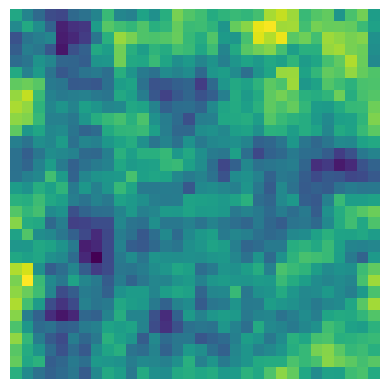

In [3]:
x, _ = free_theory_prior.sample()
plt.imshow(x)
plt.axis('off')
plt.show()